## Importing Libraries 

In [125]:
import pandas as pd
import numpy as np
# for visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# for evaluating 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

### Importing Data files using DATE as index value 

In [126]:
df_monthlysupply = pd.read_csv(r"C:\Users\nites\Downloads\Monthly Supply.csv", parse_dates=[0]).set_index('DATE')
df_unemprate = pd.read_csv(r"C:\Users\nites\Downloads\Unemployment Rate.csv",parse_dates=[0]).set_index('DATE')
df_mortgaerate = pd.read_csv(r"C:\Users\nites\Downloads\Mortgage Rate.csv",parse_dates=[0]).set_index('DATE')
df_federalfund = pd.read_csv(r"C:\Users\nites\Downloads\Federal Funds Rate.csv",parse_dates=[0]).set_index('DATE')
df_gdp = pd.read_csv(r"C:\Users\nites\Downloads\USA GDP.csv",parse_dates=[0]).set_index('DATE')
df_personalincome = pd.read_csv(r"C:\Users\nites\Downloads\Real Disposable Personal Income.csv",parse_dates=[0]).set_index('DATE')
df_delinquency = pd.read_csv(r"C:\Users\nites\Downloads\Delinquency Rate.csv",parse_dates=[0]).set_index('DATE')
df_personalsaving = pd.read_csv(r"C:\Users\nites\Downloads\Personal Saving.csv",parse_dates=[0]).set_index('DATE')
df_personalconexp = pd.read_csv(r"C:\Users\nites\Downloads\Personal Consumption Expenditures.csv",parse_dates=[0]).set_index('DATE')
df_weeklynomear = pd.read_csv(r"C:\Users\nites\Downloads\Weekly Nominal Earnings.csv",parse_dates=[0]).set_index('DATE')
df_realgdp = pd.read_csv(r"C:\Users\nites\Downloads\Real GDP.csv",parse_dates=[0]).set_index('DATE')
df_priceindex = pd.read_csv(r"C:\Users\nites\Downloads\Price Index.csv",parse_dates=[0]).set_index('DATE')

### Converting quarterly data into monthly  

In [127]:
df_delinquency_monthly = df_delinquency.resample('MS').mean()
df_weeklynomear_monthly = df_weeklynomear.resample('MS').mean()
df_realgdp_monthly = df_realgdp.resample('MS').mean()
#df_delinquency_monthly = df_delinquency_monthly.interpolate()
#df_weeklynomear_monthly = (df_weeklynomear_monthly.ffill()+df_weeklynomear_monthly.bfill())/2

In [128]:
df_delinquency_monthly.head()

,DRSFRMACBS
DATE,
2000-01-01,1.95
2000-02-01,NaN
2000-03-01,NaN
2000-04-01,1.89
2000-05-01,NaN


In [129]:
df_weeklynomear_monthly.head()

,LEU0252887700Q
DATE,
2000-01-01,603.0
2000-02-01,NaN
2000-03-01,NaN
2000-04-01,606.0
2000-05-01,NaN


In [130]:
df_realgdp_monthly.head()

,GDPC1
DATE,
2000-01-01,12935.252
2000-02-01,NaN
2000-03-01,NaN
2000-04-01,13170.749
2000-05-01,NaN


### Mergeing all csv files into single csv file  

In [131]:
df_price = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_monthlysupply,df_unemprate,on ='DATE'),df_mortgaerate, on ='DATE'),df_federalfund,on ='DATE'),df_gdp, on ='DATE'),df_personalincome, on ='DATE'),df_personalsaving, on='DATE'),df_personalconexp, on = 'DATE'),df_delinquency_monthly, on ='DATE'),df_weeklynomear_monthly, on ='DATE'),df_realgdp_monthly, on ='DATE'),df_priceindex, on ='DATE')

In [132]:
df_price.head(10)

,MSACSR,UNRATE,MORTGAGE30US,DFF,USALORSGPNOSTSAM,DSPIC96,PMSAVE,PCE,DRSFRMACBS,LEU0252887700Q,GDPC1,CSUSHPISA
DATE,,,,,,,,,,,,
2000-01-01,4.3,4.0,8.2100,5.448387,101.491397,9309.1,358.9,6542.9,1.95,603.0,12935.252,100.552
2000-02-01,4.3,4.1,8.3250,5.734828,101.552445,9345.2,324.3,6625.3,NaN,NaN,NaN,101.339
2000-03-01,4.3,4.0,8.2400,5.853548,101.626906,9370.3,311.8,6686.5,NaN,NaN,NaN,102.127
2000-04-01,4.4,3.8,8.1525,6.019667,101.698161,9418.3,347.8,6679.1,1.89,606.0,13170.749,102.922
2000-05-01,4.4,4.0,8.5150,6.268065,101.740194,9457.3,351.1,6709.7,NaN,NaN,NaN,103.677
2000-06-01,4.8,4.0,8.2880,6.528333,101.732697,9483.3,355.3,6746.9,NaN,NaN,NaN,104.424
2000-07-01,4.1,4.0,8.1475,6.544516,101.678298,9533.3,383.8,6768.5,2.07,611.0,13183.890,105.054
2000-08-01,4.4,4.1,8.0275,6.496774,101.588896,9591.5,389.9,6802.8,NaN,NaN,NaN,105.767
2000-09-01,4.0,3.9,7.9120,6.517000,101.475487,9601.5,340.8,6888.6,NaN,NaN,NaN,106.537


In [133]:
df_price.tail(10)

,MSACSR,UNRATE,MORTGAGE30US,DFF,USALORSGPNOSTSAM,DSPIC96,PMSAVE,PCE,DRSFRMACBS,LEU0252887700Q,GDPC1,CSUSHPISA
DATE,,,,,,,,,,,,
2021-04-01,4.7,6.0,3.0600,0.069000,99.112250,16146.9,2331.1,15618.7,2.41,1048.0,19368.310,250.094
2021-05-01,5.4,5.8,2.9625,0.058065,99.272288,15669.5,1872.8,15624.4,NaN,NaN,NaN,254.556
2021-06-01,5.8,5.9,2.9750,0.078000,99.450967,15603.3,1713.2,15802.0,NaN,NaN,NaN,259.249
2021-07-01,6.0,5.4,2.8680,0.098065,99.638899,15735.2,1920.5,15814.9,2.30,1068.0,19478.893,263.349
2021-08-01,6.5,5.2,2.8425,0.092258,99.831176,15720.0,1795.2,15991.1,NaN,NaN,NaN,267.028
2021-09-01,6.1,4.7,2.9000,0.079333,100.017229,15466.3,1463.7,16088.9,NaN,NaN,NaN,270.258
2021-10-01,6.9,4.6,3.0675,0.079032,100.170256,15472.4,1362.4,16309.5,2.33,1069.0,19806.290,273.154
2021-11-01,6.2,4.2,3.0675,0.079667,100.259331,15470.8,1384.4,16390.9,NaN,NaN,NaN,276.429
2021-12-01,5.6,3.9,3.0980,0.079677,100.263970,15442.7,1593.2,16242.3,NaN,NaN,NaN,280.190


### Exploratory Data Analysis 

In [134]:
df_price.reset_index(drop=True, inplace=True)  #as a index date  is not useful for the model so using reset index method i removed date index

In [135]:
df_price.head(10)

,MSACSR,UNRATE,MORTGAGE30US,DFF,USALORSGPNOSTSAM,DSPIC96,PMSAVE,PCE,DRSFRMACBS,LEU0252887700Q,GDPC1,CSUSHPISA
0,4.3,4.0,8.2100,5.448387,101.491397,9309.1,358.9,6542.9,1.95,603.0,12935.252,100.552
1,4.3,4.1,8.3250,5.734828,101.552445,9345.2,324.3,6625.3,NaN,NaN,NaN,101.339
2,4.3,4.0,8.2400,5.853548,101.626906,9370.3,311.8,6686.5,NaN,NaN,NaN,102.127
3,4.4,3.8,8.1525,6.019667,101.698161,9418.3,347.8,6679.1,1.89,606.0,13170.749,102.922
4,4.4,4.0,8.5150,6.268065,101.740194,9457.3,351.1,6709.7,NaN,NaN,NaN,103.677
5,4.8,4.0,8.2880,6.528333,101.732697,9483.3,355.3,6746.9,NaN,NaN,NaN,104.424
6,4.1,4.0,8.1475,6.544516,101.678298,9533.3,383.8,6768.5,2.07,611.0,13183.890,105.054
7,4.4,4.1,8.0275,6.496774,101.588896,9591.5,389.9,6802.8,NaN,NaN,NaN,105.767
8,4.0,3.9,7.9120,6.517000,101.475487,9601.5,340.8,6888.6,NaN,NaN,NaN,106.537
9,4.0,3.9,7.7950,6.509355,101.340753,9627.4,360.3,6893.8,2.42,614.0,13262.250,107.382


In [136]:
df_price.tail(10)

,MSACSR,UNRATE,MORTGAGE30US,DFF,USALORSGPNOSTSAM,DSPIC96,PMSAVE,PCE,DRSFRMACBS,LEU0252887700Q,GDPC1,CSUSHPISA
255,4.7,6.0,3.0600,0.069000,99.112250,16146.9,2331.1,15618.7,2.41,1048.0,19368.310,250.094
256,5.4,5.8,2.9625,0.058065,99.272288,15669.5,1872.8,15624.4,NaN,NaN,NaN,254.556
257,5.8,5.9,2.9750,0.078000,99.450967,15603.3,1713.2,15802.0,NaN,NaN,NaN,259.249
258,6.0,5.4,2.8680,0.098065,99.638899,15735.2,1920.5,15814.9,2.30,1068.0,19478.893,263.349
259,6.5,5.2,2.8425,0.092258,99.831176,15720.0,1795.2,15991.1,NaN,NaN,NaN,267.028
260,6.1,4.7,2.9000,0.079333,100.017229,15466.3,1463.7,16088.9,NaN,NaN,NaN,270.258
261,6.9,4.6,3.0675,0.079032,100.170256,15472.4,1362.4,16309.5,2.33,1069.0,19806.290,273.154
262,6.2,4.2,3.0675,0.079667,100.259331,15470.8,1384.4,16390.9,NaN,NaN,NaN,276.429
263,5.6,3.9,3.0980,0.079677,100.263970,15442.7,1593.2,16242.3,NaN,NaN,NaN,280.190
264,5.7,4.0,3.4450,0.079355,100.193185,15163.5,1047.7,16543.3,2.13,1100.0,19727.918,284.767


###  Removing NaN values using ffill and bfill method 

In [137]:
df_price = (df_price.ffill()+df_price.bfill())/2

In [138]:
df_price.head()

,MSACSR,UNRATE,MORTGAGE30US,DFF,USALORSGPNOSTSAM,DSPIC96,PMSAVE,PCE,DRSFRMACBS,LEU0252887700Q,GDPC1,CSUSHPISA
0,4.3,4.0,8.2100,5.448387,101.491397,9309.1,358.9,6542.9,1.95,603.0,12935.2520,100.552
1,4.3,4.1,8.3250,5.734828,101.552445,9345.2,324.3,6625.3,1.92,604.5,13053.0005,101.339
2,4.3,4.0,8.2400,5.853548,101.626906,9370.3,311.8,6686.5,1.92,604.5,13053.0005,102.127
3,4.4,3.8,8.1525,6.019667,101.698161,9418.3,347.8,6679.1,1.89,606.0,13170.7490,102.922
4,4.4,4.0,8.5150,6.268065,101.740194,9457.3,351.1,6709.7,1.98,608.5,13177.3195,103.677


In [139]:
df_price.shape

(265, 12)

### Renaming Columns name  

In [140]:
df_price.rename(columns = {'MSACSR':'Monthly Supply', 'UNRATE':'Unemployment Rate', 'MORTGAGE30US':'Mortgage Rate', 'DFF':'Federal Funds Rate', 'USALORSGPNOSTSAM':'USA GDP', 'DSPIC96':'Disposable Income', 'PMSAVE':'Personal Saving', 'PCE':'Consumption Expenditures', 'DRSFRMACBS':'Delinquency Rate', 'LEU0252887700Q':'Nominal Earnings', 'GDPC1':'Real GDP', 'CSUSHPISA':'Price Index'}, inplace = True)

In [141]:
df_price.head()

,Monthly Supply,Unemployment Rate,Mortgage Rate,Federal Funds Rate,USA GDP,Disposable Income,Personal Saving,Consumption Expenditures,Delinquency Rate,Nominal Earnings,Real GDP,Price Index
0,4.3,4.0,8.2100,5.448387,101.491397,9309.1,358.9,6542.9,1.95,603.0,12935.2520,100.552
1,4.3,4.1,8.3250,5.734828,101.552445,9345.2,324.3,6625.3,1.92,604.5,13053.0005,101.339
2,4.3,4.0,8.2400,5.853548,101.626906,9370.3,311.8,6686.5,1.92,604.5,13053.0005,102.127
3,4.4,3.8,8.1525,6.019667,101.698161,9418.3,347.8,6679.1,1.89,606.0,13170.7490,102.922
4,4.4,4.0,8.5150,6.268065,101.740194,9457.3,351.1,6709.7,1.98,608.5,13177.3195,103.677


In [142]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Monthly Supply            265 non-null    float64
 1   Unemployment Rate         265 non-null    float64
 2   Mortgage Rate             265 non-null    float64
 3   Federal Funds Rate        265 non-null    float64
 4   USA GDP                   265 non-null    float64
 5   Disposable Income         265 non-null    float64
 6   Personal Saving           265 non-null    float64
 7   Consumption Expenditures  265 non-null    float64
 8   Delinquency Rate          265 non-null    float64
 9   Nominal Earnings          265 non-null    float64
 10  Real GDP                  265 non-null    float64
 11  Price Index               265 non-null    float64
dtypes: float64(12)
memory usage: 25.0 KB


### Checking any missing  value in the dataset 

In [143]:
df_price.isnull().sum()

Monthly Supply              0
Unemployment Rate           0
Mortgage Rate               0
Federal Funds Rate          0
USA GDP                     0
Disposable Income           0
Personal Saving             0
Consumption Expenditures    0
Delinquency Rate            0
Nominal Earnings            0
Real GDP                    0
Price Index                 0
dtype: int64

In [144]:
df_price.describe()

,Monthly Supply,Unemployment Rate,Mortgage Rate,Federal Funds Rate,USA GDP,Disposable Income,Personal Saving,Consumption Expenditures,Delinquency Rate,Nominal Earnings,Real GDP,Price Index
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,5.758491,5.950566,4.989968,1.636559,99.889733,12304.084528,873.528679,10769.224906,4.631660,803.811321,16164.514445,166.582038
std,1.880103,1.944536,1.371733,1.884929,1.294200,1849.055814,738.496949,2542.163077,3.232384,125.751710,1870.768617,37.080033
min,3.300000,3.500000,2.684000,0.049000,91.580035,9309.100000,193.400000,6542.900000,1.400000,603.000000,12935.252000,100.552000
25%,4.300000,4.600000,3.890000,0.129000,99.543817,10839.000000,418.700000,8850.100000,2.130000,697.000000,14956.291000,141.646000
50%,5.300000,5.400000,4.714000,1.004516,99.930092,12060.900000,752.200000,10514.300000,2.960000,791.000000,15807.995000,163.666000
75%,6.500000,6.900000,6.095000,2.377667,100.544633,13567.100000,1048.500000,12701.700000,7.135000,886.000000,17671.535000,184.329000
max,12.200000,14.700000,8.515000,6.544516,101.829671,19119.500000,6392.500000,16543.300000,11.360000,1100.000000,19806.290000,284.767000


<AxesSubplot:>

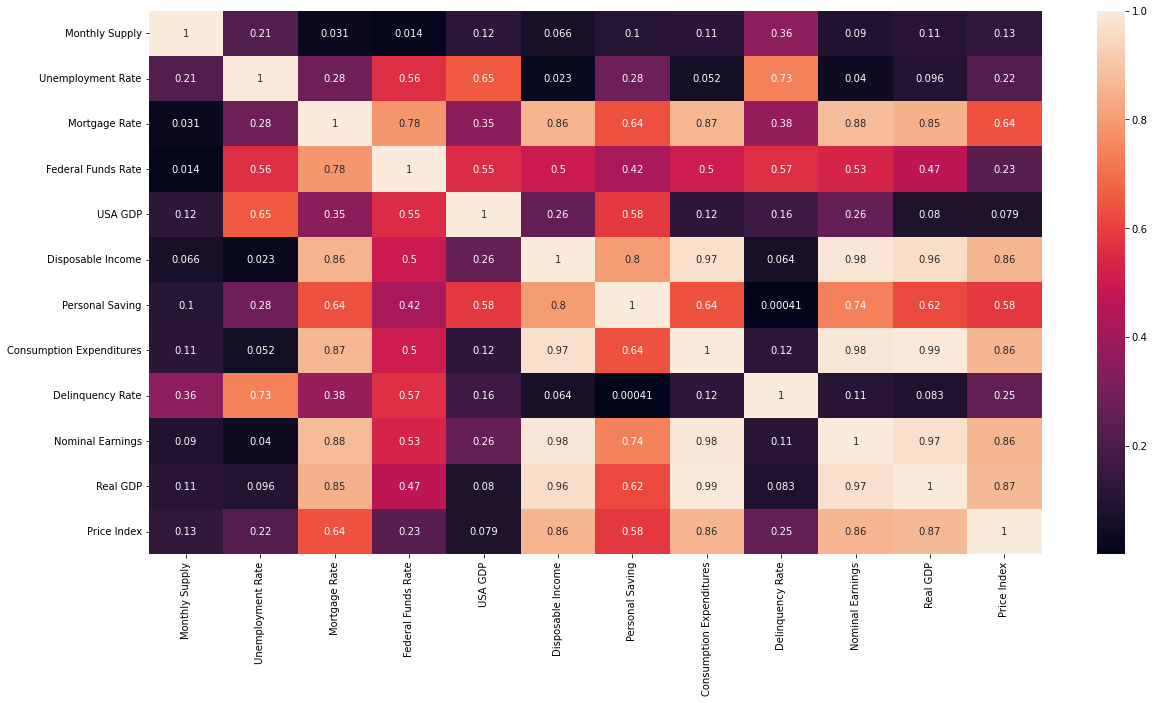

In [145]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_price.corr().abs(), annot = True)

In corr graph we can see some columns have positive correlation and some have negative corr. like USA GDP have negative correlation with price Index unemployment rate also have some negative corr. with price Index.

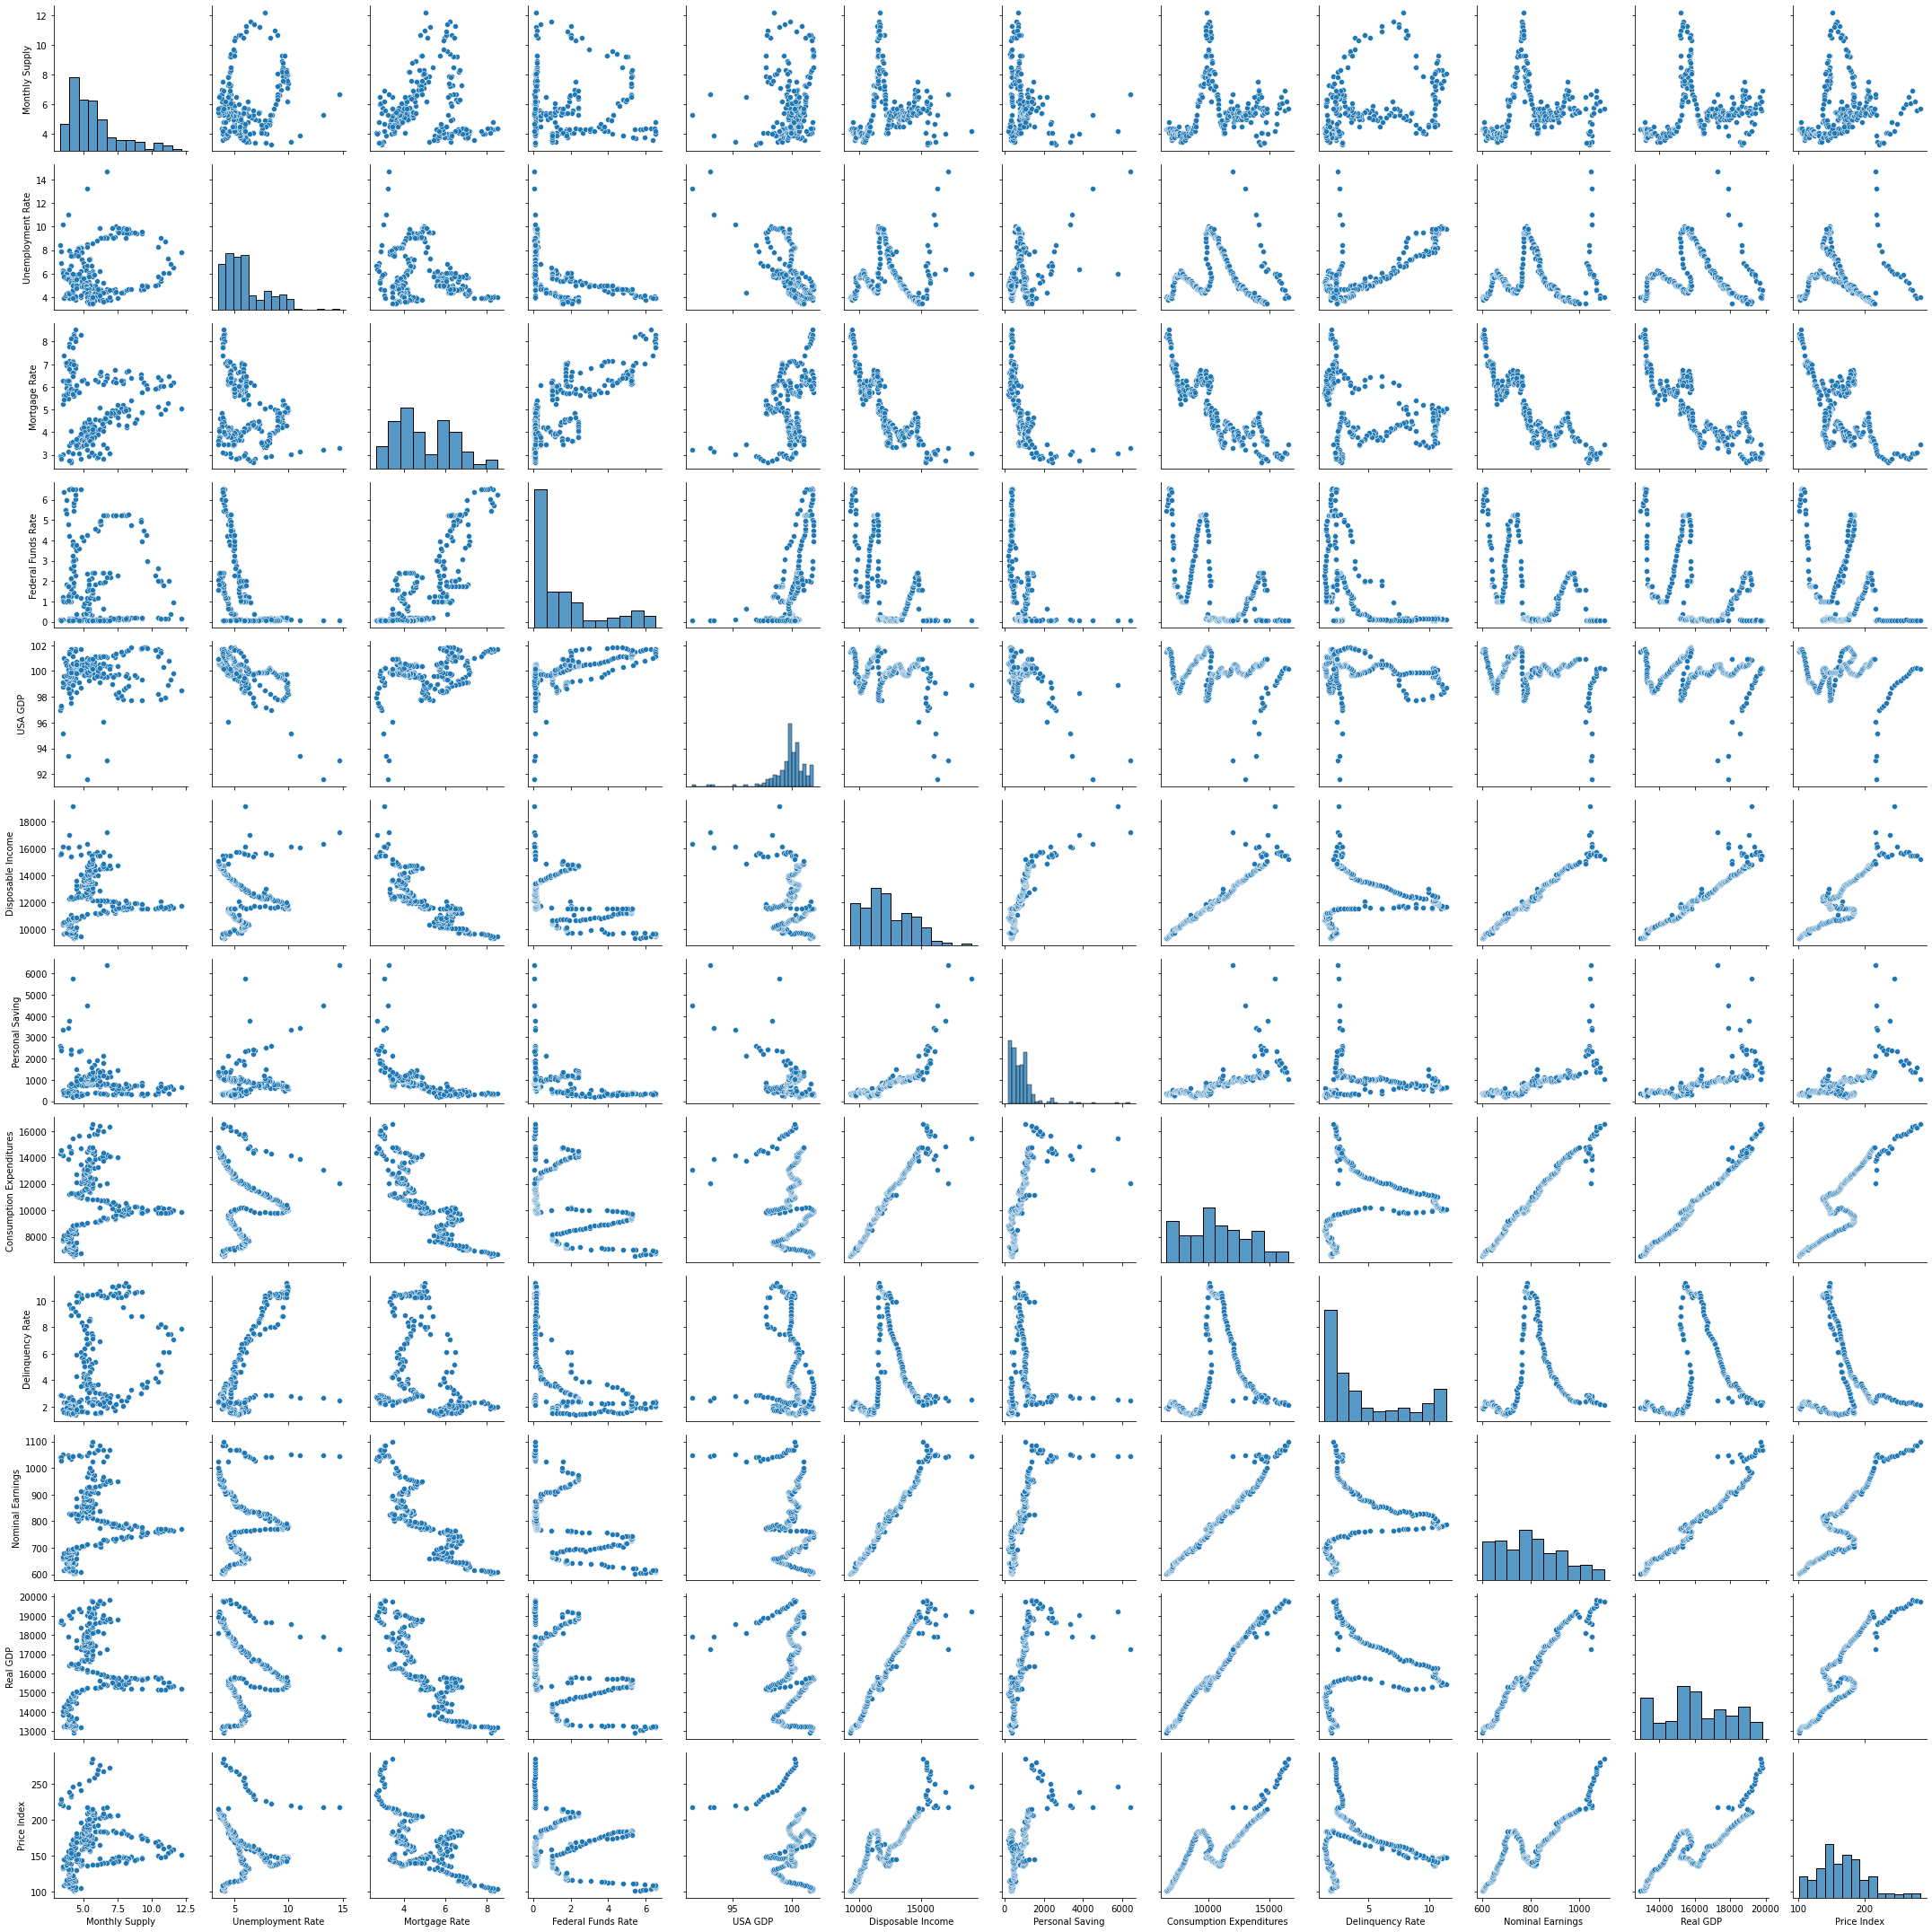

In [149]:
sns.pairplot(df_price)
plt.tight_layout()

Pairplot show monthly supply, unemployment Rate, personal svaing have long right skewed data and USA GDP have left skewed data. some features have linearity in distribution. 

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


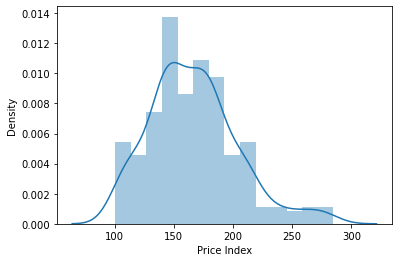

In [150]:
sns.distplot(df_price['Price Index']);

### Seperating X(Independent)  and Y(Dependent) variable  

In [151]:
x = df_price.drop('Price Index', axis =1)
y = df_price['Price Index']

In [152]:
#x.skew(axis = 0, skipna = True)

In [153]:
#y.skew(axis = 0, skipna = True)

In [154]:
#for col in x.columns:
   # if np.abs(x[col].skew()) > 0.7:
       # x[col] = np.log1p(x[col])

In [155]:
#y =  np.log1p(y)

### spliting data into train and test using train_test_split 

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0 )

In [157]:
x_train.head()

,Monthly Supply,Unemployment Rate,Mortgage Rate,Federal Funds Rate,USA GDP,Disposable Income,Personal Saving,Consumption Expenditures,Delinquency Rate,Nominal Earnings,Real GDP
196,5.1,4.8,3.6000,0.365161,99.851573,13515.1,976.1,12624.4,4.385,883.0,17671.5350
55,4.3,5.4,5.8675,1.429355,99.886847,10693.5,450.6,8271.6,1.530,686.5,14531.7135
157,4.1,7.7,3.5325,0.145000,99.880367,12224.9,698.3,11282.1,9.450,827.5,16452.9435
44,3.8,6.1,6.1475,1.010000,99.309835,10369.1,439.1,7853.7,1.805,664.5,14050.7680
190,5.5,5.1,3.9425,0.117667,100.103871,13417.7,1010.7,12397.5,5.050,875.0,17514.0220


In [158]:
#x_test.head()
y_test.head()

110    148.659
97     171.542
83     184.141
8      106.537
161    154.194
Name: Price Index, dtype: float64

### Scaling Data because some features values are different and are not normally distributed 

In [159]:
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test) 

### Model Building Using Linear regression,  GradientBoostingRegressor, RandomForestRegressor

In [160]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
pred = lr.predict(x_test_scaled)
print(lr.score(x_train_scaled, y_train))
print(lr.score(x_test_scaled, y_test))

0.9527388015010082
0.8978483997231272


In [161]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Root Mean Squared Error: 10.951537246546923


In [162]:
output_lr = pd.DataFrame({'actual':np.array(y_test).flatten(),'pred':np.array(pred).flatten()})
output_lr

,actual,pred
0,148.659,155.932734
1,171.542,170.628210
2,184.141,171.205009
3,106.537,112.371122
4,154.194,151.236776
5,163.400,161.723099
6,168.058,168.473227
7,179.111,174.050686
8,159.330,156.054471
9,184.364,171.574661


Gradient Boosting Regressor using Hyperparameter tuning

In [163]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [164]:
param_grid = {'n_estimators':[100,200,250,300,400]} 

model = GradientBoostingRegressor(random_state=1313, learning_rate = 0.1,
                                  max_depth = 4, min_samples_leaf = 3)
kfold = KFold(n_splits=num_folds, random_state=1313, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train_scaled, y_train)



print("Best: %f using %s" % (grid_result.best_score_, 
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -11.209296 using {'n_estimators': 400}
-11.310681 (22.494929) with: {'n_estimators': 100}
-11.228173 (22.529470) with: {'n_estimators': 200}
-11.221059 (22.553471) with: {'n_estimators': 250}
-11.213234 (22.554856) with: {'n_estimators': 300}
-11.209296 (22.546869) with: {'n_estimators': 400}


Random Forest Regressor using hyperparameter Tuning

In [165]:
rf =RandomForestRegressor()
param = dict(max_depth=[10,11,12,13,14,15,19,20], max_features=[3,4,5,6,7])
grid_rf = GridSearchCV(estimator=rf , param_grid = param, n_jobs = -1)
grid_rf.fit(x_train,y_train)
print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

0.9957240823927249
RandomForestRegressor(max_depth=15, max_features=4)


In [166]:
rf=RandomForestRegressor(max_depth=15,max_features=4)
results_rt = cross_val_score(rf, x_train, y_train , cv=10, scoring='neg_mean_squared_error')
print(results_rt.mean())

-5.360414667596172


In [167]:
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,pred_rf))

5.824471106594633

In [120]:
output = pd.DataFrame({'actual':np.array(y_test).flatten(),'pred':np.array(pred_rf).flatten()})
output

,actual,pred
0,148.659,150.348119
1,171.542,172.424454
2,184.141,183.325235
3,106.537,107.303280
4,154.194,150.032252
5,163.400,162.184385
6,168.058,169.435239
7,179.111,178.670346
8,159.330,160.040979
9,184.364,182.401014
